In [ ]:
! gdown --id 1ZkAd2URfLRUrXEQ2mres4me8Rw5hsuOm

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZkAd2URfLRUrXEQ2mres4me8Rw5hsuOm
To: /content/messidor.zip
100% 550M/550M [00:03<00:00, 142MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/messidor.zip"

with ZipFile(file_name,'r') as openZip:
  openZip.extractall()
  print('Done')

Done


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_data = train_datagen.flow_from_directory(directory = '/content/messidor/train_data',
                                                  batch_size = 32,
                                                  target_size = (512, 512),
                                                  class_mode = 'categorical',
                                                  seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = '/content/messidor/validation_data',
                                                 batch_size = 32,
                                                 target_size = (512, 512),
                                                 class_mode = 'categorical',
                                                 seed = 42)

test_data = test_datagen.flow_from_directory(directory = '/content/messidor/test_data',
                                                classes=['0','1', '2', '3'],
                                                 batch_size = 32,
                                                 target_size = (512, 512),
                                                 class_mode = 'categorical',
                                                 seed = 42)

Found 1613 images belonging to 4 classes.
Found 160 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# create tensorboard callback

import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M")
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir= log_dir)
  return tensorboard_callbacks

In [ ]:
def create_model(model_url, num_classes = 4):
  '''
  Takes a Tensorflow hub urla nd creates a keras Sequential model with it

  Args:
    model_url(str): A tensorflow hub feature extraction URL.
    num_classes (int): Number of output neuraons in the output layer,
      should be equal to Number of target classes, default 10.

  Return:
     An uncompiled Keras Sequentail model with model_url as feature extractor
     layer and Dense output layer with num_classes output neurons.
  '''
  feature_extractor_layer = hub.KerasLayer(model_url,
                                          trainable = False,
                                          name = 'feature_extration_layer',
                                          input_shape = (512, 512, 3)) # Freeze the already learned patterns

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation = 'softmax', name = 'output_layer')
  ])

  return model

In [ ]:
resenet_url = "https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/5"
resnet = create_model(resenet_url,
                      num_classes=4)

In [ ]:
resnet.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
from keras import callbacks
resnet.fit(train_data,
           steps_per_epoch=len(train_data),
           callbacks = create_tensorboard_callback("/content/tensoflow_callbacks", "resnet_10_percent"),
           validation_data=test_data,
           epochs=5)

Epoch 1/5
51/51 [==============================] - 101s 2s/step - loss: 103.8158 - accuracy: 0.2455 - val_loss: 11.7266 - val_accuracy: 0.2958
Epoch 2/5
29/51 [================>.............] - ETA: 34s - loss: 27.8446 - accuracy: 0.2420

KeyboardInterrupt: ignored

In [ ]:
efficient_net_url = "https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5"
E_net = create_model(resenet_url,
                      num_classes=4)

In [ ]:
E_net.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
from keras import callbacks
E_net.fit(train_data,
           steps_per_epoch=len(train_data),
           callbacks = create_tensorboard_callback("/content/tensoflow_callbacks", "resnet_10_percent"),
           validation_data=test_data,
           epochs=5)

Epoch 1/5
51/51 [==============================] - 71s 1s/step - loss: 70.9226 - accuracy: 0.2858 - val_loss: 18.9738 - val_accuracy: 0.2667
Epoch 2/5
51/51 [==============================] - 65s 1s/step - loss: 19.9318 - accuracy: 0.2994 - val_loss: 12.3656 - val_accuracy: 0.3417
Epoch 3/5
51/51 [==============================] - 65s 1s/step - loss: 28.6833 - accuracy: 0.2864 - val_loss: 18.4931 - val_accuracy: 0.3542
Epoch 4/5
51/51 [==============================] - 65s 1s/step - loss: 35.4666 - accuracy: 0.2821 - val_loss: 8.3764 - val_accuracy: 0.3083
Epoch 5/5
51/51 [==============================] - 65s 1s/step - loss: 37.9486 - accuracy: 0.2889 - val_loss: 60.1420 - val_accuracy: 0.1458


In [ ]:
E_net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extration_layer (Ke  (None, 2048)             23561152  
 rasLayer)                                                       
                                                                 
 output_layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 23,569,348
Trainable params: 8,196
Non-trainable params: 23,561,152
_________________________________________________________________


In [ ]:
! gdown --id 1jOePlBj7WzMzZ3uPC4g6Ny-eC3yFTbrN

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jOePlBj7WzMzZ3uPC4g6Ny-eC3yFTbrN
To: /content/messidor_150.zip
100% 375M/375M [00:05<00:00, 70.2MB/s]


In [ ]:
 ! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-04-27 00:14:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-04-27 00:14:41 (70.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
! gdown --id 1_KrmbjSPeGCVsjAj-dUpyeffW9mde7ap

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_KrmbjSPeGCVsjAj-dUpyeffW9mde7ap
To: /content/test_data.zip
100% 99.9M/99.9M [00:01<00:00, 64.6MB/s]


In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
unzip_data('messidor_150.zip')

In [ ]:
unzip_data('test_data.zip')

In [ ]:
train_dir = "/content/messidor_150/train_data"
valid_dir = "/content/messidor_150/validation_data"
test_dir = "/content/test_data"

In [ ]:
import tensorflow as tf

In [ ]:
Img_size = (512, 512)
Batch_size = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = 'categorical',
                                                                 batch_size=Batch_size,
                                                                 image_size=Img_size,)

valid_data = tf.keras.preprocessing.image_dataset_from_directory(valid_dir,
                                                                 label_mode='categorical',
                                                                 batch_size = Batch_size,
                                                                 image_size = Img_size)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                class_names=['0','1','2','3'],
                                                                label_mode='categorical',
                                                                batch_size=Batch_size,
                                                                image_size=Img_size)

Found 571 files belonging to 4 classes.
Found 160 files belonging to 4 classes.
Found 240 files belonging to 4 classes.


In [ ]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name+'/'+experiment_name
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)
  print(f'saving TensorBoard log files to : {log_dir}')
  return tensorboard_callback

In [ ]:
checkpoint_path1 = "model1_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path1,
                                                         monitor='val_loss',
                                                         verbose = 1,
                                                         save_weights_only=True,
                                                         save_best_only=True)
checkpoint_path2 = "model2_weights/checkpoint.ckpt"

checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path2,
                                                         monitor='val_loss',
                                                         verbose = 1,
                                                         save_weights_only=True,
                                                         save_best_only=True)

In [ ]:
def create_checkpoint(checkpoint_path):
  return tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                            monitory = 'val_loss',
                                            verbose = 1,
                                            save_weights_only = True,
                                            save_best_only = True)

## Model 1 - 150 each class, except class 1(118) - No Data Augmentation, feature extractor

ResNet50V2


In [ ]:
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D

In [ ]:
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(512, 512, 3))

x = base_model(inputs)

x = GlobalAveragePooling2D()(x)

x = Dense(4, activation = 'softmax')(x)

model1 = tf.keras.Model(inputs = inputs, outputs = x)

94668760/94668760 [==============================] - 5s 0us/step


In [ ]:
model1.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
history1 = model1.fit(train_data,
                      epochs = 15,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data),
                      callbacks = [create_tensorboard_callback('tensorboard/','model1_feature_extracter'),checkpoint_callback]
           )

saving TensorBoard log files to : tensorboard//model1_feature_extracter
Epoch 1/15
18/18 [==============================] - ETA: 0s - loss: 14.3720 - accuracy: 0.2539
Epoch 1: val_loss improved from inf to 3.36422, saving model to model1_weights/checkpoint.ckpt
18/18 [==============================] - 38s 960ms/step - loss: 14.3720 - accuracy: 0.2539 - val_loss: 3.3642 - val_accuracy: 0.3562
Epoch 2/15
18/18 [==============================] - ETA: 0s - loss: 4.3195 - accuracy: 0.2715
Epoch 2: val_loss did not improve from 3.36422
18/18 [==============================] - 16s 687ms/step - loss: 4.3195 - accuracy: 0.2715 - val_loss: 5.5754 - val_accuracy: 0.2812
Epoch 3/15
18/18 [==============================] - ETA: 0s - loss: 3.1960 - accuracy: 0.2644
Epoch 3: val_loss did not improve from 3.36422
18/18 [==============================] - 15s 656ms/step - loss: 3.1960 - accuracy: 0.2644 - val_loss: 3.4057 - val_accuracy: 0.2562
Epoch 4/15
18/18 [==============================] - ETA: 0s

In [ ]:
model1.evaluate(test_data)

8/8 [==============================] - 9s 818ms/step - loss: 4.3914 - accuracy: 0.2208


[4.391376972198486, 0.22083333134651184]

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,572,996
Trainable params: 8,196
Non-trainable params: 23,564,800
_________________________________________________________________


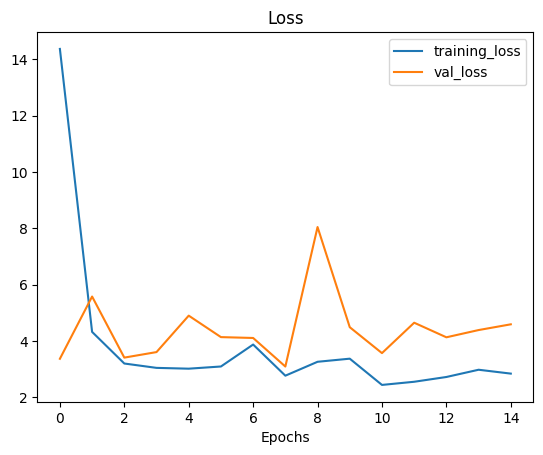

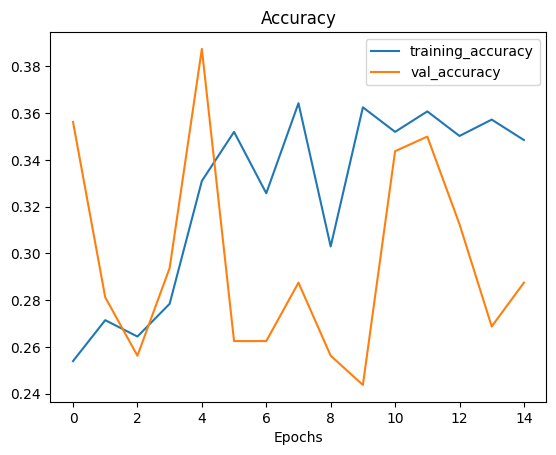

In [ ]:
plot_loss_curves(history1)

## Model2 - Feature Extracter - with Data augmentation, ResNet50B2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
data_aug_layer = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
    #preprocessing.Rescale(1./255)
], name = 'data_aug_layer')

In [ ]:
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (512, 512, 3))

x = data_aug_layer(inputs, training = True)
x = base_model(x, training = False)

x = GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(4, activation = 'softmax')(x)

model2 = tf.keras.Model(inputs = inputs, outputs = outputs)


In [ ]:
model2.compile(loss = tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
history2 = model2.fit(train_data,
                      epochs = 15,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data),
                      callbacks = [create_tensorboard_callback('tensorboard/','model2_feature_extracter'),checkpoint_callback2]
           )

saving TensorBoard log files to : tensorboard//model2_feature_extracter
Epoch 1/15
18/18 [==============================] - ETA: 0s - loss: 16.3572 - accuracy: 0.2487
Epoch 1: val_loss improved from inf to 11.59533, saving model to model2_weights/checkpoint.ckpt
18/18 [==============================] - 141s 8s/step - loss: 16.3572 - accuracy: 0.2487 - val_loss: 11.5953 - val_accuracy: 0.2250
Epoch 2/15
18/18 [==============================] - ETA: 0s - loss: 8.2234 - accuracy: 0.2697
Epoch 2: val_loss improved from 11.59533 to 4.83760, saving model to model2_weights/checkpoint.ckpt
18/18 [==============================] - 128s 7s/step - loss: 8.2234 - accuracy: 0.2697 - val_loss: 4.8376 - val_accuracy: 0.2875
Epoch 3/15
18/18 [==============================] - ETA: 0s - loss: 5.9330 - accuracy: 0.2907
Epoch 3: val_loss did not improve from 4.83760
18/18 [==============================] - 125s 7s/step - loss: 5.9330 - accuracy: 0.2907 - val_loss: 7.0981 - val_accuracy: 0.2562
Epoch 4/15

In [ ]:
model2.evaluate(test_data)

8/8 [==============================] - 34s 4s/step - loss: 3.7205 - accuracy: 0.3375


[3.7205231189727783, 0.3375000059604645]

In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 data_aug_layer (Sequential)  (None, None, None, 3)    0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 23,572,996
Trainable params: 8,196
Non-trainable params: 23,564,800
___________________________________________

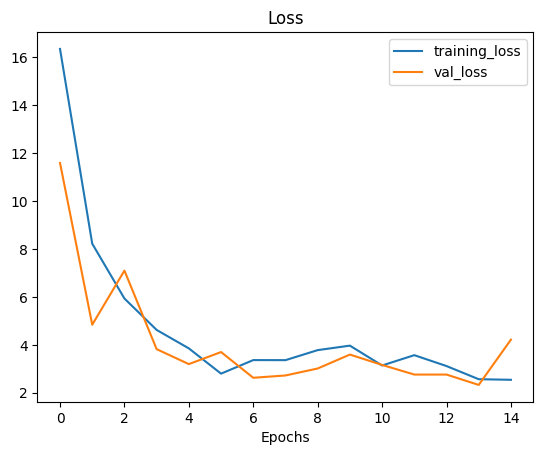

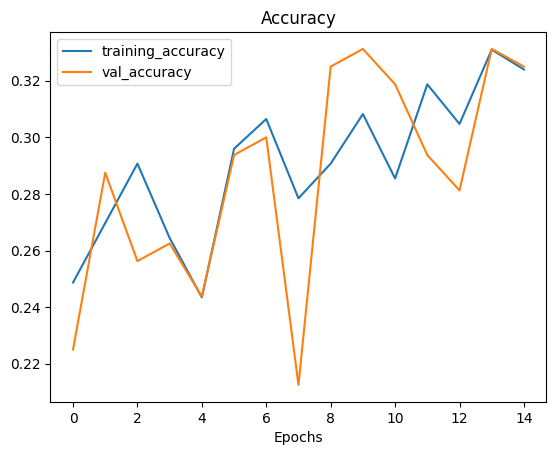

In [ ]:
plot_loss_curves(history2)

## Model 3 - top 10 layers trainable - without data augmentation

In [ ]:
model1.load_weights(checkpoint_path1)

In [ ]:
model1.layers

In [ ]:
for layer in model1.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fae6046c520> True
<keras.engine.functional.Functional object at 0x7fae60483190> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7fae6048cd60> True
<keras.layers.core.dense.Dense object at 0x7fae6048cdc0> True


In [ ]:
for i, layer in enumerate(model1.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [ ]:
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape=(512, 512, 3))

x = base_model(inputs)

x = GlobalAveragePooling2D()(x)

x = Dense(4, activation = 'softmax')(x)

model1 = tf.keras.Model(inputs = inputs, outputs = x)

In [ ]:
model1.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning you typically lower the learning rate by some amount
               metrics = ['accuracy'])

In [ ]:
for layer_number, layer in enumerate(model1.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [ ]:
# fine tune for another 15 epochs
fine_tune_epochs = 15 + 45
history3 = model1.fit(train_data,
                      epochs = fine_tune_epochs,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data),
           callbacks=[create_tensorboard_callback("tensorflow_hub", "model3_EfficientNetB0"), create_checkpoint("model3_weights/checkpoints3.cktp")],
           initial_epoch = history1.epoch[-1])

saving TensorBoard log files to : tensorflow_hub/model3_EfficientNetB0
Epoch 15/60
18/18 [==============================] - ETA: 0s - loss: 1.2172 - accuracy: 0.4781
Epoch 15: val_loss improved from inf to 1.35363, saving model to model3_weights/checkpoints3.cktp
18/18 [==============================] - 17s 773ms/step - loss: 1.2172 - accuracy: 0.4781 - val_loss: 1.3536 - val_accuracy: 0.3688
Epoch 16/60
18/18 [==============================] - ETA: 0s - loss: 1.2200 - accuracy: 0.4606
Epoch 16: val_loss did not improve from 1.35363
18/18 [==============================] - 15s 682ms/step - loss: 1.2200 - accuracy: 0.4606 - val_loss: 1.3577 - val_accuracy: 0.3438
Epoch 17/60
18/18 [==============================] - ETA: 0s - loss: 1.2074 - accuracy: 0.4694
Epoch 17: val_loss improved from 1.35363 to 1.33790, saving model to model3_weights/checkpoints3.cktp
18/18 [==============================] - 16s 738ms/step - loss: 1.2074 - accuracy: 0.4694 - val_loss: 1.3379 - val_accuracy: 0.3562


In [ ]:
model1.evaluate(test_data)

8/8 [==============================] - 7s 407ms/step - loss: 1.4181 - accuracy: 0.4000


[1.4181021451950073, 0.4000000059604645]

In [ ]:
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 23,572,996
Trainable params: 3,424,260
Non-trainable params: 20,148,736
_________________________________________________________________


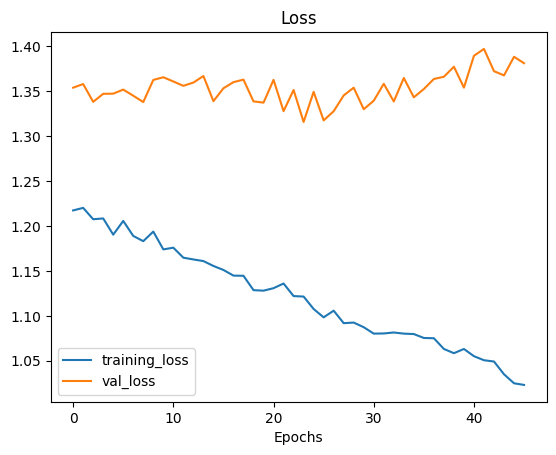

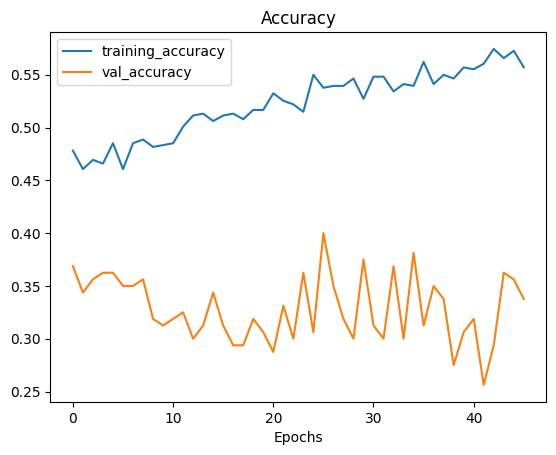

In [ ]:
plot_loss_curves(history3)

## Model4 - top 10 layers trainable with data augmentation

In [ ]:
for layer in model2.layers:
  print(layer)

In [ ]:
for i, layer in enumerate(model2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [ ]:
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape = (512, 512, 3))

x = data_aug_layer(inputs, training = True)
x = base_model(x, training = False)

x = GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(4, activation = 'softmax')(x)

model2 = tf.keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
model2.load_weights(checkpoint_path2)

In [ ]:
model2.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning you typically lower the learning rate by some amount
               metrics = ['accuracy'])

In [ ]:
# fine tune for another 5 epochs
fine_tune_epochs = 15 + 15
history4 = model2.fit(train_data,
                      epochs = fine_tune_epochs,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data),
           callbacks=[create_tensorboard_callback("tensorflow_hub", "model4_EfficientNetB0"),create_checkpoint("model4_weights/checkpoints4.cktp")],
           initial_epoch = history2.epoch[-1])

saving TensorBoard log files to : tensorflow_hub/model4_EfficientNetB0
Epoch 15/30
18/18 [==============================] - ETA: 0s - loss: 44.0215 - accuracy: 0.3047
Epoch 15: val_loss improved from inf to 3.14596, saving model to model4_weights/checkpoints4.cktp
18/18 [==============================] - 98s 5s/step - loss: 44.0215 - accuracy: 0.3047 - val_loss: 3.1460 - val_accuracy: 0.2062
Epoch 16/30
18/18 [==============================] - ETA: 0s - loss: 5.9712 - accuracy: 0.2750
Epoch 16: val_loss did not improve from 3.14596
18/18 [==============================] - 95s 5s/step - loss: 5.9712 - accuracy: 0.2750 - val_loss: 4.8832 - val_accuracy: 0.2313
Epoch 17/30
18/18 [==============================] - ETA: 0s - loss: 3.7920 - accuracy: 0.2785
Epoch 17: val_loss improved from 3.14596 to 1.96282, saving model to model4_weights/checkpoints4.cktp
18/18 [==============================] - 84s 4s/step - loss: 3.7920 - accuracy: 0.2785 - val_loss: 1.9628 - val_accuracy: 0.2188
Epoch 1

In [ ]:
model2.evaluate(test_data)

8/8 [==============================] - 25s 3s/step - loss: 2.0535 - accuracy: 0.1958


[2.053506851196289, 0.19583334028720856]

In [ ]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 data_aug_layer (Sequential)  (None, None, None, 3)    0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 23,572,996
Trainable params: 3,424,260
Non-trainable params: 20,148,736
_______________________________________

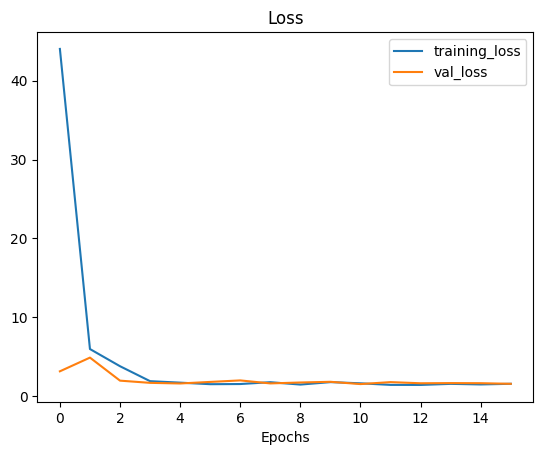

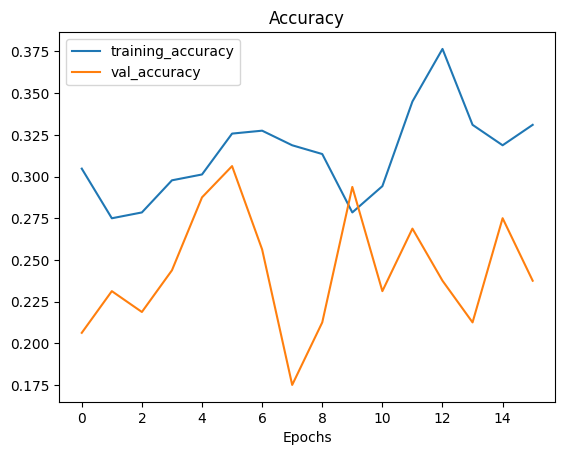

In [ ]:
plot_loss_curves(history4)

Model 5 - top 20 trainable layers without data augmentation

In [ ]:
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-20]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape=(512, 512, 3))

x = base_model(inputs)

x = GlobalAveragePooling2D()(x)

x = Dense(4, activation = 'softmax')(x)

model1 = tf.keras.Model(inputs = inputs, outputs = x)

In [ ]:
model1.load_weights('model3_weights/checkpoints3.cktp')

In [ ]:
model1.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning you typically lower the learning rate by some amount
               metrics = ['accuracy'])

In [ ]:
# fine tune for another 5 epochs
fine_tune_epochs = 15 + 15 + 45
history5 = model1.fit(train_data,
                      epochs = fine_tune_epochs,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data),
           callbacks=[create_tensorboard_callback("tensorflow_hub", "model5_EfficientNetB0"), create_checkpoint("model5_weights/checkpoints5.cktp")],
           initial_epoch = 45)

saving TensorBoard log files to : tensorflow_hub/model5_EfficientNetB0
Epoch 46/75
18/18 [==============================] - ETA: 0s - loss: 1.3075 - accuracy: 0.3485
Epoch 46: val_loss improved from inf to 12.96459, saving model to model5_weights/checkpoints5.cktp
18/18 [==============================] - 27s 950ms/step - loss: 1.3075 - accuracy: 0.3485 - val_loss: 12.9646 - val_accuracy: 0.2500
Epoch 47/75
18/18 [==============================] - ETA: 0s - loss: 1.2367 - accuracy: 0.4063
Epoch 47: val_loss improved from 12.96459 to 5.87890, saving model to model5_weights/checkpoints5.cktp
18/18 [==============================] - 17s 745ms/step - loss: 1.2367 - accuracy: 0.4063 - val_loss: 5.8789 - val_accuracy: 0.2500
Epoch 48/75
18/18 [==============================] - ETA: 0s - loss: 1.1721 - accuracy: 0.4834
Epoch 48: val_loss improved from 5.87890 to 4.05351, saving model to model5_weights/checkpoints5.cktp
18/18 [==============================] - 17s 781ms/step - loss: 1.1721 - ac

In [ ]:
model1.evaluate(test_data)

8/8 [==============================] - 6s 414ms/step - loss: 1.4664 - accuracy: 0.3167


[1.4664405584335327, 0.3166666626930237]

In [ ]:
model1.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 512, 512, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling2d_7   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 23,572,996
Trainable params: 7,887,876
Non-trainable params: 15,685,120
_________________________________________________________________


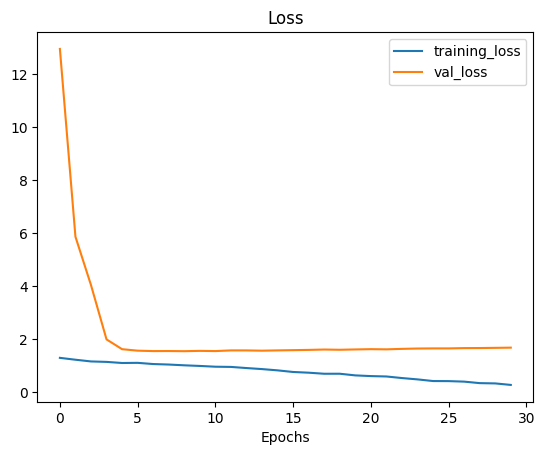

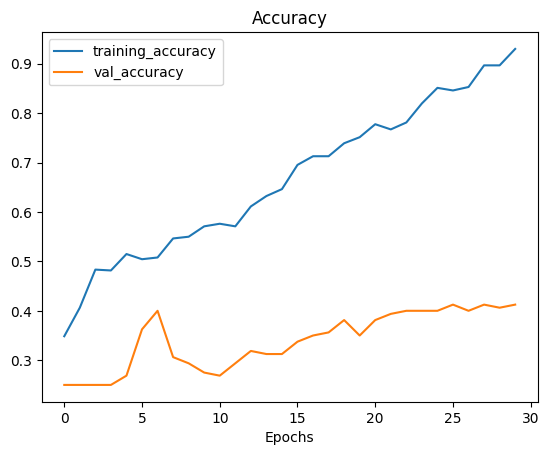

In [ ]:
plot_loss_curves(history5)

## Model 6 - top 20 trainable layers with data augmentation

In [ ]:
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = True

for layer in base_model.layers[:-20]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape = (512, 512, 3))

x = data_aug_layer(inputs, training = True)
x = base_model(x, training = False)

x = GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(4, activation = 'softmax')(x)

model2 = tf.keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
model2.load_weights("model4_weights/checkpoints4.cktp")

In [ ]:
model2.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning you typically lower the learning rate by some amount
               metrics = ['accuracy'])

In [ ]:
# fine tune for another 5 epochs
fine_tune_epochs = 15 + 15 + 45
history6 = model2.fit(train_data,
                      epochs = fine_tune_epochs,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data),
           callbacks=[create_tensorboard_callback("tensorflow_hub", "model6_EfficientNetB0"),create_checkpoint("model6_weights/checkpoints6.cktp")],
           initial_epoch = 30)

saving TensorBoard log files to : tensorflow_hub/model6_EfficientNetB0
Epoch 31/75
18/18 [==============================] - ETA: 0s - loss: 806.3002 - accuracy: 0.2609
Epoch 31: val_loss improved from inf to 78.44003, saving model to model6_weights/checkpoints6.cktp
18/18 [==============================] - 77s 4s/step - loss: 806.3002 - accuracy: 0.2609 - val_loss: 78.4400 - val_accuracy: 0.2500
Epoch 32/75
18/18 [==============================] - ETA: 0s - loss: 33.9624 - accuracy: 0.2312
Epoch 32: val_loss improved from 78.44003 to 10.27190, saving model to model6_weights/checkpoints6.cktp
18/18 [==============================] - 72s 4s/step - loss: 33.9624 - accuracy: 0.2312 - val_loss: 10.2719 - val_accuracy: 0.2562
Epoch 33/75
18/18 [==============================] - ETA: 0s - loss: 7.0573 - accuracy: 0.2434
Epoch 33: val_loss improved from 10.27190 to 1.94555, saving model to model6_weights/checkpoints6.cktp
18/18 [==============================] - 67s 4s/step - loss: 7.0573 - ac

In [ ]:
model2.summary()

## DenseNet

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Flatten, BatchNormalization, Activation, Dropout, Dense
from tensorflow.keras.applications import DenseNet121

In [ ]:
model12 = tf.keras.Sequential()
model12.add(DenseNet121(input_shape=(512,512,3),include_top=False,weights=None))
model12.add(Flatten())
model12.add(BatchNormalization())
model12.add(Dense(64,kernel_initializer='he_uniform'))
model12.add(BatchNormalization())
model12.add(Activation('relu'))
model12.add(Dropout(0.5))
model12.add(Dense(128,kernel_initializer='he_uniform'))
model12.add(BatchNormalization())
model12.add(Activation('relu'))
model12.add(Dropout(0.5))
model12.add(Dense(256,kernel_initializer='he_uniform'))
model12.add(BatchNormalization())
model12.add(Activation('relu'))
model12.add(Dropout(0.5))
model12.add(Dense(64,kernel_initializer='he_uniform'))
model12.add(BatchNormalization())
model12.add(Activation('relu'))
model12.add(Dropout(0.5))
model12.add(Dense(32,kernel_initializer='he_uniform'))
model12.add(BatchNormalization())
model12.add(Activation('relu'))
model12.add(Dropout(0.5))
# Creating an output layer
model12.add(Dense(units= 4, activation='softmax'))


In [ ]:
model12.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 16, 16, 1024)      7037504   
                                                                 
 flatten_6 (Flatten)         (None, 262144)            0         
                                                                 
 batch_normalization_31 (Bat  (None, 262144)           1048576   
 chNormalization)                                                
                                                                 
 dense_30 (Dense)            (None, 64)                16777280  
                                                                 
 batch_normalization_32 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 activation_25 (Activation)  (None, 64)               

In [ ]:
model12.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
history7 = model12.fit(train_data,
                      epochs = 15,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data),
           )

Epoch 1/15


ResourceExhaustedError: ignored

In [ ]:
base_model = tf.keras.applications.DenseNet121(include_top=False)
base_model.trainable = True

for layer in base_model.layers[:-100]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape=(512, 512, 3))

x = base_model(inputs)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(4, activation = 'softmax')(x)

model3 = tf.keras.Model(inputs = inputs, outputs = x)

29084464/29084464 [==============================] - 0s 0us/step


NameError: ignored

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 zero_padding2d_2 False
2 conv1/conv False
3 conv1/bn False
4 conv1/relu False
5 zero_padding2d_3 False
6 pool1 False
7 conv2_block1_0_bn False
8 conv2_block1_0_relu False
9 conv2_block1_1_conv False
10 conv2_block1_1_bn False
11 conv2_block1_1_relu False
12 conv2_block1_2_conv False
13 conv2_block1_concat False
14 conv2_block2_0_bn False
15 conv2_block2_0_relu False
16 conv2_block2_1_conv False
17 conv2_block2_1_bn False
18 conv2_block2_1_relu False
19 conv2_block2_2_conv False
20 conv2_block2_concat False
21 conv2_block3_0_bn False
22 conv2_block3_0_relu False
23 conv2_block3_1_conv False
24 conv2_block3_1_bn False
25 conv2_block3_1_relu False
26 conv2_block3_2_conv False
27 conv2_block3_concat False
28 conv2_block4_0_bn False
29 conv2_block4_0_relu False
30 conv2_block4_1_conv False
31 conv2_block4_1_bn False
32 conv2_block4_1_relu False
33 conv2_block4_2_conv False
34 conv2_block4_concat False
35 conv2_block5_0_bn False
36 conv2_block5_0_relu False
37 conv2_block5_

In [ ]:
model3.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
history8 = model3.fit(train_data,
                      epochs = 15,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data),
           )

Epoch 1/15
51/51 [==============================] - 124s 2s/step - loss: 23.4565 - accuracy: 0.3137 - val_loss: 1259.4333 - val_accuracy: 0.2937
Epoch 2/15
51/51 [==============================] - 80s 2s/step - loss: 10.8220 - accuracy: 0.3689 - val_loss: 3099.2202 - val_accuracy: 0.2562
Epoch 3/15
51/51 [==============================] - 74s 1s/step - loss: 10.7082 - accuracy: 0.3906 - val_loss: 679.5546 - val_accuracy: 0.2000
Epoch 4/15
51/51 [==============================] - 73s 1s/step - loss: 11.6243 - accuracy: 0.3825 - val_loss: 92.5072 - val_accuracy: 0.2375
Epoch 5/15
51/51 [==============================] - 75s 1s/step - loss: 8.4808 - accuracy: 0.4458 - val_loss: 86.0621 - val_accuracy: 0.4938
Epoch 6/15
51/51 [==============================] - 74s 1s/step - loss: 7.7611 - accuracy: 0.4458 - val_loss: 267.3389 - val_accuracy: 0.2562
Epoch 7/15
51/51 [==============================] - 75s 1s/step - loss: 9.0969 - accuracy: 0.4575 - val_loss: 52.9440 - val_accuracy: 0.3250
Ep

In [ ]:
 x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

In [ ]:
base_model = tf.keras.applications.DenseNet121(include_top=False)
base_model.trainable = True

#for layer in base_model.layers[:-100]:
#  layer.trainable = False

inputs = tf.keras.layers.Input(shape=(512, 512, 3))

x = base_model(inputs)
x = BatchNormalization()(x)
x = Dense(64, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(4, activation = 'softmax')(x)

model4 = tf.keras.Model(inputs = inputs, outputs = x)

In [ ]:
model4.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
history8 = model4.fit(train_data,
                      epochs = 15,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data),
           )

Epoch 1/15
51/51 [==============================] - 142s 1s/step - loss: 1.9015 - accuracy: 0.2771 - val_loss: 64.0210 - val_accuracy: 0.2937
Epoch 2/15
51/51 [==============================] - 60s 1s/step - loss: 1.5399 - accuracy: 0.3422 - val_loss: 1.3845 - val_accuracy: 0.4688
Epoch 3/15
51/51 [==============================] - 59s 1s/step - loss: 1.4383 - accuracy: 0.3416 - val_loss: 1.1938 - val_accuracy: 0.4938
Epoch 4/15
51/51 [==============================] - 59s 1s/step - loss: 1.3710 - accuracy: 0.3627 - val_loss: 1.2390 - val_accuracy: 0.3812
Epoch 5/15
51/51 [==============================] - 60s 1s/step - loss: 1.3502 - accuracy: 0.3707 - val_loss: 1.3313 - val_accuracy: 0.2500
Epoch 6/15
51/51 [==============================] - 60s 1s/step - loss: 1.3163 - accuracy: 0.3862 - val_loss: 1.2909 - val_accuracy: 0.2625
Epoch 7/15
51/51 [==============================] - 60s 1s/step - loss: 1.2581 - accuracy: 0.4172 - val_loss: 1.2417 - val_accuracy: 0.2562
Epoch 8/15
51/51 [

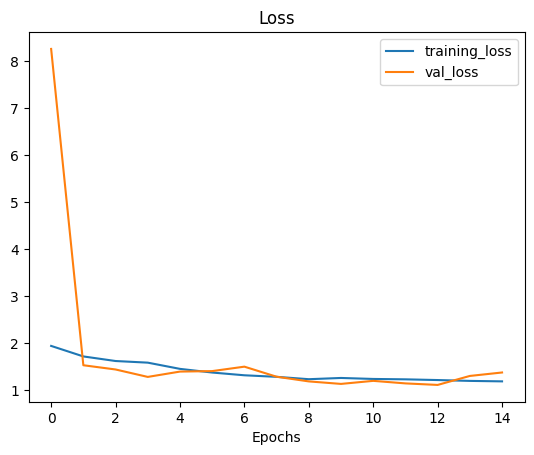

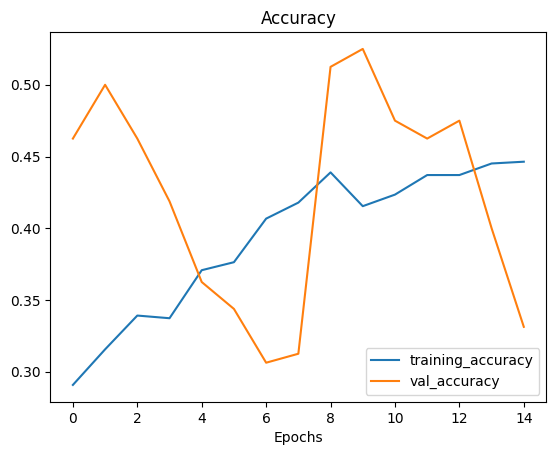

In [ ]:
plot_loss_curves(history8)

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
base_model = tf.keras.applications.DenseNet121(include_top=False)
base_model.trainable = True

for layer in base_model.layers[:-100]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape = (512, 512, 3))

x = data_aug_layer(inputs, training = True)
x = base_model(x)
x = BatchNormalization()(x)
x = Dense(64, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(4, activation = 'softmax')(x)

model5 = tf.keras.Model(inputs = inputs, outputs = x)

In [ ]:
model5.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
history9 = model5.fit(train_data,
                      epochs = 15,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data),
           )

Epoch 1/15
51/51 [==============================] - 181s 3s/step - loss: 1.4435 - accuracy: 0.2598 - val_loss: 2.4580 - val_accuracy: 0.2313
Epoch 2/15
51/51 [==============================] - 150s 3s/step - loss: 1.3559 - accuracy: 0.3373 - val_loss: 1.1964 - val_accuracy: 0.4750
Epoch 3/15
51/51 [==============================] - 158s 3s/step - loss: 1.2847 - accuracy: 0.3887 - val_loss: 1.2246 - val_accuracy: 0.3812
Epoch 4/15
51/51 [==============================] - 148s 3s/step - loss: 1.2766 - accuracy: 0.3986 - val_loss: 1.0969 - val_accuracy: 0.5000
Epoch 5/15
51/51 [==============================] - 140s 3s/step - loss: 1.2597 - accuracy: 0.4061 - val_loss: 1.4372 - val_accuracy: 0.2562
Epoch 6/15
51/51 [==============================] - 138s 3s/step - loss: 1.2535 - accuracy: 0.3924 - val_loss: 1.1605 - val_accuracy: 0.4125
Epoch 7/15
51/51 [==============================] - 181s 4s/step - loss: 1.2287 - accuracy: 0.4179 - val_loss: 1.4065 - val_accuracy: 0.2750
Epoch 8/15
51

In [ ]:
x = data_aug_layer(inputs, training = True)

In [ ]:
base_model = tf.keras.applications.DenseNet121(include_top=False)
base_model.trainable = True

for layer in base_model.layers[:-200]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape = (512, 512, 3))

x = data_aug_layer(inputs, training = True)
x = base_model(x)
x = BatchNormalization()(x)
x = Dense(64, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(4, activation = 'softmax')(x)

model5 = tf.keras.Model(inputs = inputs, outputs = x)

NameError: ignored

In [ ]:
base_model = tf.keras.applications.ResNet101V2(include_top=False)
base_model.trainable = True

for layer in base_model.layers[:-100]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape=(512, 512, 3))

x = base_model(inputs)
x = BatchNormalization()(x)
x = Dense(64, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, kernel_initializer = 'he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(4, activation = 'softmax')(x)

model6 = tf.keras.Model(inputs = inputs, outputs = x)

In [ ]:
model6.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])
history10 = model6.fit(train_data,
                      epochs = 35,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data),
           )

Epoch 1/35
51/51 [==============================] - 87s 1s/step - loss: 1.2809 - accuracy: 0.4024 - val_loss: 1.1684 - val_accuracy: 0.4812
Epoch 2/35
51/51 [==============================] - 60s 1s/step - loss: 1.2317 - accuracy: 0.4272 - val_loss: 1.1275 - val_accuracy: 0.5188
Epoch 3/35
51/51 [==============================] - 60s 1s/step - loss: 1.2214 - accuracy: 0.4420 - val_loss: 1.1214 - val_accuracy: 0.5125
Epoch 4/35
51/51 [==============================] - 60s 1s/step - loss: 1.2141 - accuracy: 0.4414 - val_loss: 1.2105 - val_accuracy: 0.5063
Epoch 5/35
51/51 [==============================] - 60s 1s/step - loss: 1.2106 - accuracy: 0.4396 - val_loss: 1.2257 - val_accuracy: 0.4000
Epoch 6/35
51/51 [==============================] - 60s 1s/step - loss: 1.2160 - accuracy: 0.4315 - val_loss: 1.2342 - val_accuracy: 0.4250
Epoch 7/35
51/51 [==============================] - 60s 1s/step - loss: 1.1962 - accuracy: 0.4482 - val_loss: 1.1844 - val_accuracy: 0.5312
Epoch 8/35
51/51 [==

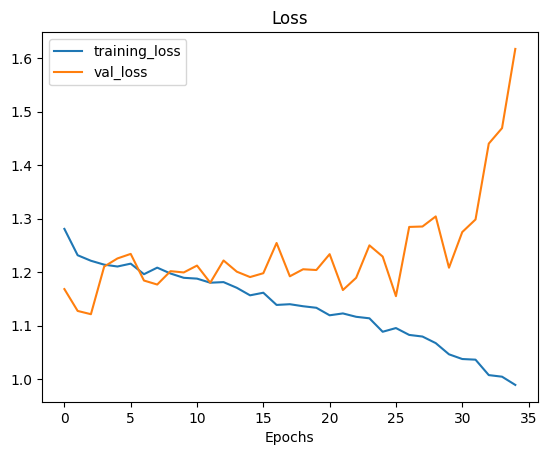

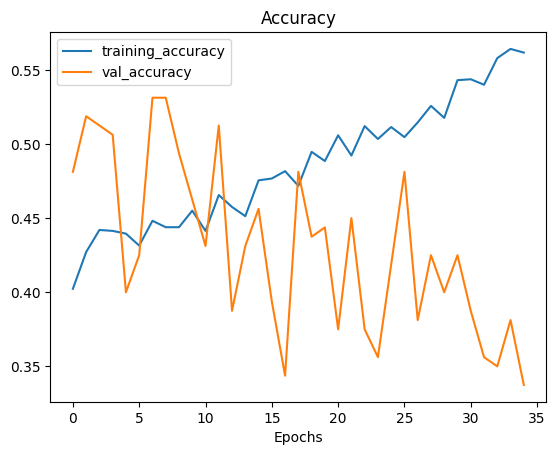

In [ ]:
plot_loss_curves(history10)